# NRE7203: Advanced Reactor Physics

Copyright (c) Dan Kotlyar

Under Copyright law, you do not have the right to provide these notes to anyone else or to make any commercial use of them without express prior permission from me.

In [115]:
# import relevant packages
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 16

In [116]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [6, 4] # Set default figure size

# Neutron Transport with Monte Carlo

##  Description

The purpose of this workshop is to implement **two techniques** that are used in Monte Carlo codes:
1. Surface (ray-tracing) - **ST**
2. Delta tracking - **DT**.

### Problem set-up

We will have a point source (located at the origin) surrounded with multiple shells of heterogeneous materials having unique cross sections. Our objectives are to calculate the:
- Flux distribution, which for simplicity is defined as the neutrons crossing a certain surface
- Leakage from the system (i.e., sphere)

## Set of exercises

You are required to complete the following exercises:
1. Analytic solution
2. Ray-tracing
3. Delta tracking

### Analytic solution

The programming will be done within the ``pointsource_sphere.py`` file.
Note that we use object-oriented programming. This is not mandatory and only done here as a means of demonestration.

Open the file to familiarize yourself with the ``__init__`` method. This is done together with the lecturer.
Note that the entire volume is divided to equal-volume shells, according to which the corresponding radii are calculated. Also, the total and absorption cross sections are identical (i.e., no scattering)

**Complete** the ``_Analytic`` function that enables to calculate the analytic solution. 

The _analytic solution_ can be derived as:

$\frac{I(R_i)}{I_0}={\prod}_{j=1}^i e^{-\Sigma_{t,j}\Delta R_j}$

with the _leakage calculated_ when $i$ represents the last shell (i.e., $R_{sphere}$)

**Import the class**:

```python
    >>> mc = PointSourceInSphere(nMC, S0, R, sigT)
```

where,
- ``nMC`` is the number of Monte Carlo repetitive simulations
- ``S0``  is the number of source neutrons
- ``R`` is the radius of the sphere in cm
- ``sigT`` total cross section array for all the different regions

**results** are stored under the ``resAN``, ``resST``, ``resDT`` dictionaries on the created ``mc`` object.

**Define inputs and execute analytic solution**

In [117]:
from pointsource_sphere import PointSourceInSphere

In [118]:
xs = np.random.uniform(low = 0.1, high = 0.25, size = (30))
# xs[6] = 3
mc = PointSourceInSphere(100, 10000, 12.0, xs) # np.full(10, 0.1)
print(xs)

[0.176501   0.2070751  0.20427257 0.15860559 0.15637731 0.2024238
 0.24527605 0.11580691 0.17080137 0.16303241 0.24845441 0.11987619
 0.11850086 0.19295638 0.12545192 0.11110262 0.1135676  0.19371089
 0.13655721 0.17385801 0.13937613 0.21607866 0.20794862 0.2116668
 0.21684943 0.21385561 0.24084494 0.24641954 0.21830522 0.20647605]


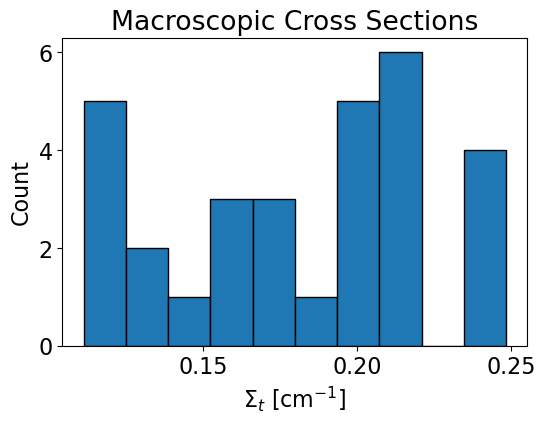

In [141]:
plt.hist(xs, edgecolor = "black")
plt.title("Macroscopic Cross Sections")
plt.xlabel(r"$\Sigma_t$ [cm$^{-1}]$")
plt.ylabel("Count")
plt.show()

In [120]:
mc.Solve('analytic')

In [121]:
mc.resAN

{'flx': array([5057.87143099, 4108.60232796, 3558.16652675, 3255.46798368,
        3023.1831431 , 2780.27472072, 2539.05908582, 2442.08649843,
        2316.43020042, 2210.48994692, 2067.79734731, 2006.08323396,
        1950.04626966, 1866.43523431, 1816.41550644, 1775.09479823,
        1735.49524434, 1672.45361355, 1630.9404321 , 1581.32040348,
        1543.88796282, 1489.32778613, 1440.13023952, 1393.08242889,
        1347.73242121, 1305.57582611, 1260.81778628, 1217.67124598,
        1181.53989588, 1149.09739488]),
 'leakage': np.float64(0.11490973948821107)}

In [122]:
print("Leakage = {:.2f} %".format(100*mc.resAN['leakage']))

Leakage = 11.49 %


In [123]:
# Sanity check
print("Expected leakage = {:.2f} %".format(100*np.exp(-12*0.1)))

Expected leakage = 30.12 %


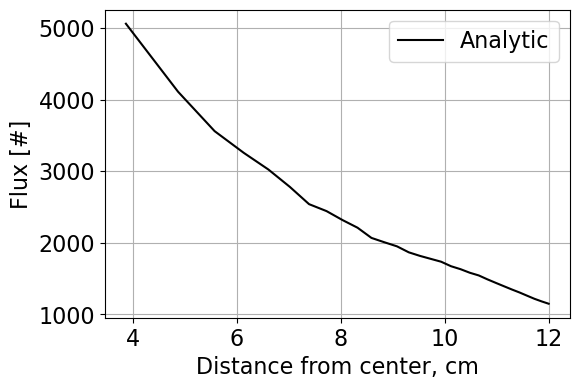

In [124]:
mc.PlotFluxes('analytic')

### Ray-tracing

Complete the ``_SolveST`` method. 
Note that the sampling of the point source should not be performed at all as it is known that all the neutrons are born in the origin.
However, the purpose was to describe the general sampling approach within the sphere.

Also, all the source neutrons are sampled simultaneously (vectorized) as opposed to one-by-one.
**The general approach of ST is**:
1. Sample $x_0$, $y_0$, $z_0$
2. Sample distance traveled $S_i$
3. Update the position  $x_1$, $y_1$, $z_1$
4. Check if the position is within the shell where the neutrons originated or not
   - If within the shell, then terminate the neutron
   - Otherwise, promote the neutron in the same direction to the end of the shell and update $x_0$, $y_0$, $z_0$ and go to step 2. 
5. If the neutron crossses the last shell terminate it
6. Our scoring is fairly random here and we will be scoring neutrons that crossed a specific surface. This is easy to do with ST and in this specific case even easier as all the neutrons are traveling in the radial direction only and no scattering events are happening.

**Define inputs and execute ST solution**

In [125]:
mc.Solve('ST')

In [126]:
mc.resST

{'flx': array([5055.96, 4107.85, 3556.88, 3250.15, 3019.65, 2776.33, 2533.93,
        2437.31, 2311.56, 2205.74, 2064.87, 2003.87, 1948.32, 1865.53,
        1815.14, 1774.27, 1735.73, 1673.44, 1631.6 , 1583.96, 1545.84,
        1491.15, 1442.66, 1394.99, 1349.67, 1307.64, 1262.09, 1219.2 ,
        1183.31, 1151.85]),
 'fluxsim': array([[5145., 4991., 4956., ..., 5113., 5072., 5049.],
        [4192., 4093., 4016., ..., 4133., 4098., 4112.],
        [3669., 3544., 3519., ..., 3538., 3574., 3526.],
        ...,
        [1267., 1210., 1235., ..., 1227., 1163., 1194.],
        [1233., 1161., 1200., ..., 1186., 1132., 1161.],
        [1208., 1119., 1163., ..., 1155., 1104., 1126.]], shape=(30, 100)),
 'errflx': array([50.43628059, 47.97131956, 46.43388418, 45.76753762, 44.22677357,
        40.0140113 , 38.97852101, 37.99597215, 38.1639411 , 38.54623717,
        36.77870444, 36.94608369, 37.41173078, 35.99290347, 35.88649328,
        35.75831512, 35.8449034 , 34.35005677, 33.89011655, 31.8317

In [127]:
print(np.std(mc.resST['fluxsim'][0]))
print(np.mean(np.abs((mc.resST['flx'])-(mc.resAN['flx'])))/(mc.resAN['flx']))



50.43628059244654
[0.00046266 0.00056955 0.00065766 0.00071881 0.00077404 0.00084166
 0.00092162 0.00095822 0.0010102  0.00105861 0.00113166 0.00116648
 0.0012     0.00125375 0.00128828 0.00131827 0.00134835 0.00139917
 0.00143479 0.00147981 0.00151569 0.00157121 0.00162489 0.00167977
 0.00173629 0.00179235 0.00185598 0.00192174 0.00198051 0.00203643]


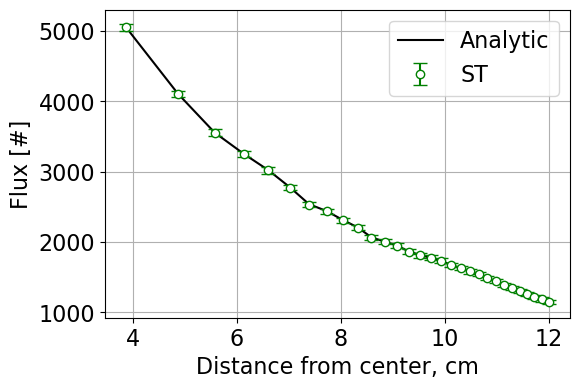

In [128]:
mc.PlotFluxes('ST')

In [129]:
print("Analytic Leakage = {:.2f} %".format(100*mc.resAN['leakage']))
print("MC/ST Leakage = {:.2f} %".format(100*mc.resST['leakage']))

Analytic Leakage = 11.49 %
MC/ST Leakage = 11.52 %


### Delta tracking

Complete the ``_SolveDT`` method. 

**The general approach of DT is**:
1. Sample $x_0$, $y_0$, $z_0$
2. Sample virtual distance traveled $S_i$ using the majorant cross section.
3. Update the position  $x_1$, $y_1$, $z_1$
4. Accept the virtual collision as a real one by sampling uniformly from [0, 1] and comparing to the $\Sigma_t/\Sigma_{maj}$
   - If virtual collision accepted (i.e. a real collision occurred), then terminate the neutron
   - Otherwise, use the new position as $x_0$, $y_0$, $z_0$ and go to step 2. 

**Define inputs and execute ST solution**

In [130]:
mc.Solve('DT')

In [131]:
mc.resDT

{'flx': array([5060.88, 4113.04, 3560.3 , 3258.12, 3023.67, 2779.05, 2538.2 ,
        2441.  , 2314.39, 2209.37, 2064.98, 2003.3 , 1947.26, 1864.11,
        1814.5 , 1773.41, 1734.02, 1670.87, 1629.99, 1578.88, 1540.6 ,
        1485.56, 1437.31, 1389.99, 1344.88, 1303.17, 1258.64, 1215.22,
        1180.18, 1147.72]),
 'fluxsim': array([[5166., 5000., 5077., ..., 5115., 5092., 5025.],
        [4213., 4087., 4086., ..., 4186., 4123., 4054.],
        [3660., 3531., 3559., ..., 3628., 3558., 3509.],
        ...,
        [1224., 1269., 1276., ..., 1205., 1210., 1198.],
        [1187., 1221., 1240., ..., 1168., 1165., 1165.],
        [1144., 1189., 1208., ..., 1131., 1127., 1134.]], shape=(30, 100)),
 'errflx': array([53.68803964, 50.70383023, 47.39229895, 47.0925217 , 45.75304471,
        43.29281118, 39.88433276, 40.64037401, 39.97921835, 40.81902865,
        39.96573032, 38.64906208, 38.19230813, 36.84043838, 34.82599604,
        33.88571823, 32.8332088 , 33.11092116, 33.81345738, 32.4562

In [132]:
print(np.std(mc.resDT['fluxsim'][0]))

53.6880396364032


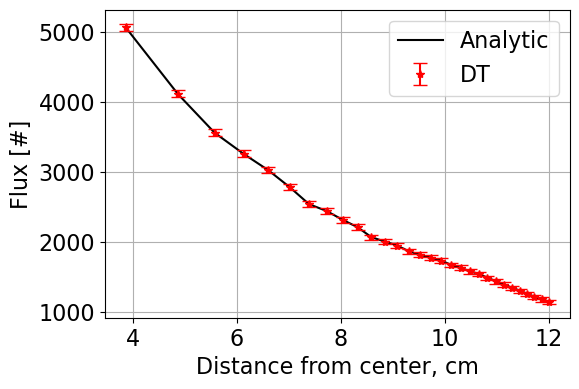

In [133]:
mc.PlotFluxes('DT')

### Weighted Delta tracking

In [134]:
mc.Solve('wdt')

In [135]:
mc.resWDT

{'flx': array([4437.81144298, 3607.24816772, 3127.23144244, 2917.61601978,
        2759.95056655, 2545.83536794, 2305.24210792, 2258.44619489,
        2156.96807961, 2074.80693072, 1933.56554811, 1896.64132594,
        1862.89693243, 1787.68518568, 1754.41503774, 1729.55928276,
        1705.55356924, 1647.18946011, 1615.05925725, 1570.56948264,
        1541.00381795, 1487.78783102, 1440.89413489, 1395.22790532,
        1350.42106814, 1308.70062511, 1264.33040135, 1221.82068146,
        1185.32550308, 1152.67017606]),
 'fluxsim': array([[4410.26250816, 4393.53674902, 4449.7176438 , ..., 4457.79816288,
         4505.66994641, 4367.53044392],
        [3606.12098914, 3538.32301517, 3599.85501925, ..., 3601.17300766,
         3644.4098188 , 3549.56221913],
        [3136.38757503, 3048.74175551, 3129.6606196 , ..., 3102.33131656,
         3172.96291658, 3090.15142815],
        ...,
        [1230.42324015, 1168.72879226, 1197.41404669, ..., 1230.28116591,
         1271.16388495, 1172.07705334

In [136]:
print(np.std(mc.resWDT['fluxsim'][0]))

40.687851746435555


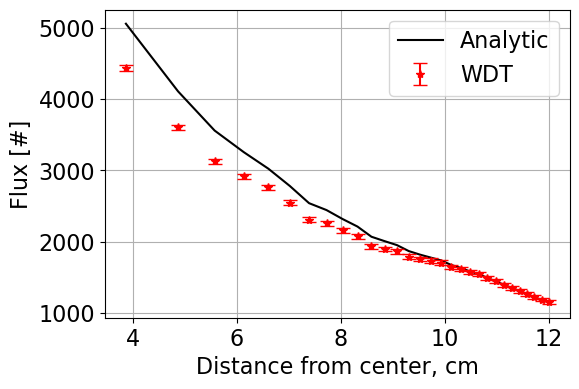

In [137]:
mc.PlotFluxes('WDT')

In [138]:
print("Analytic Leakage = {:.2f} %".format(100*mc.resAN['leakage']))
print("MC/ST Leakage = {:.2f} %".format(100*mc.resST['leakage']))
print("MC/DT Leakage = {:.2f} %".format(100*mc.resDT['leakage']))
print("MC/WDT Leakage = {:.2f} %".format(100*mc.resWDT['leakage']))

Analytic Leakage = 11.49 %
MC/ST Leakage = 11.52 %
MC/DT Leakage = 11.48 %
MC/WDT Leakage = 11.53 %


**Execution times**

In [139]:
print("ST = {:.2f}".format(mc.times['ST']))
print("DT = {:.2f}".format(mc.times['DT']))
print("WDT = {:.2f}".format(mc.times['WDT']))

ST = 39.01
DT = 22.20
WDT = 27.75


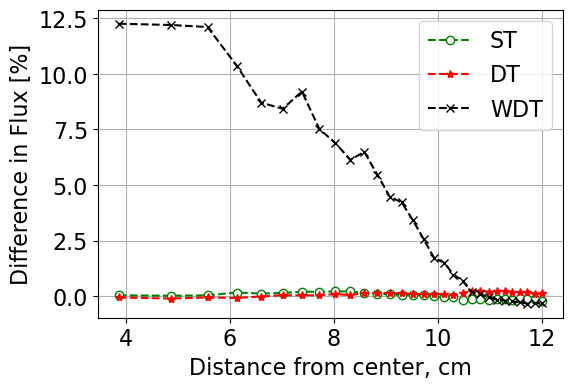

In [140]:
mc.PlotDifferences()